In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

In [2]:
from math import pi

In [3]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

# Oracle begin.

In [ ]:
def oracle(find_me = '0000'):
    find_me = find_me[::-1]
    print(find_me)
    n = 4
    grover_circuit = QuantumCircuit(n)
    grover_circuit = initialize_s(grover_circuit, [0,1,2,3])
    for i in range(len(find_me)):
        if find_me[i] == '0':
            grover_circuit.x(i)
        else:
            pass
    #cccz begin
    grover_circuit.barrier([0, 1, 2,3])
    grover_circuit.cu1(pi/4, 0, 3)
    grover_circuit.cx(0, 1)
    grover_circuit.cu1(-pi/4, 1, 3)
    grover_circuit.cx(0, 1)
    grover_circuit.cu1(pi/4, 1, 3)
    grover_circuit.cx(1, 2)
    grover_circuit.cu1(-pi/4, 2, 3)
    grover_circuit.cx(0, 2)
    grover_circuit.cu1(pi/4, 2, 3)
    grover_circuit.cx(1, 2)
    grover_circuit.cu1(-pi/4, 2, 3)
    grover_circuit.cx(0, 2)
    grover_circuit.cu1(pi/4, 2, 3)
    #cccz end
    
    for i in range(len(find_me)):
        if find_me[i] == '0':
            grover_circuit.x(i)
            print(i)
        else:
            pass
    return grover_circuit

In [8]:
grover_circuit = oracle('1100')
grover_circuit.draw()

0011
0
1


┌───┐┌───┐ ░                                                          »
q_0: ┤ H ├┤ X ├─░──■──────■───────────■──────────────────────■─────────────»
     ├───┤├───┤ ░  │    ┌─┴─┐       ┌─┴─┐                    │             »
q_1: ┤ H ├┤ X ├─░──┼────┤ X ├─■─────┤ X ├─■──────■───────────┼──────────■──»
     ├───┤└───┘ ░  │    └───┘ │     └───┘ │    ┌─┴─┐       ┌─┴─┐      ┌─┴─┐»
q_2: ┤ H ├──────░──┼──────────┼───────────┼────┤ X ├─■─────┤ X ├─■────┤ X ├»
     ├───┤      ░  │π/4       │-π/4       │π/4 └───┘ │-π/4 └───┘ │π/4 └───┘»
q_3: ┤ H ├──────░──■──────────■───────────■──────────■───────────■─────────»
     └───┘      ░                                                          »
«                 ┌───┐ 
«q_0: ─────────■──┤ X ├─
«      ┌───┐   │  └───┘ 
«q_1: ─┤ X ├───┼────────
«      └───┘ ┌─┴─┐      
«q_2: ─■─────┤ X ├─■────
«      │-π/4 └───┘ │π/4 
«q_3: ─■───────────■────
«

# Oracle End

# Amplification

In [9]:
grover_circuit.barrier([0, 1, 2,3])
grover_circuit.h(0)
grover_circuit.h(1)
grover_circuit.h(2)
grover_circuit.h(3)
grover_circuit.x(0)
grover_circuit.x(1)
grover_circuit.x(2)
grover_circuit.x(3)
grover_circuit.draw()

┌───┐┌───┐ ░                                                           »
q_0: ┤ H ├┤ X ├─░──■─────────■──────────────■────────────────────────────■──»
     ├───┤└───┘ ░  │       ┌─┴─┐          ┌─┴─┐                          │  »
q_1: ┤ H ├──────░──┼───────┤ X ├─■────────┤ X ├─■─────────■──────────────┼──»
     ├───┤┌───┐ ░  │       └───┘ │        └───┘ │       ┌─┴─┐          ┌─┴─┐»
q_2: ┤ H ├┤ X ├─░──┼─────────────┼──────────────┼───────┤ X ├─■────────┤ X ├»
     ├───┤├───┤ ░  │P(π/4)       │P(-π/4)       │P(π/4) └───┘ │P(-π/4) └───┘»
q_3: ┤ H ├┤ X ├─░──■─────────────■──────────────■─────────────■─────────────»
     └───┘└───┘ ░                                                           »
«                                            ░ ┌───┐ ░ ┌───┐┌───┐
«q_0: ──────────────────────────■────────────░─┤ X ├─░─┤ H ├┤ X ├
«                               │            ░ └───┘ ░ ├───┤├───┤
«q_1: ───────────■──────────────┼────────────░───────░─┤ H ├┤ X ├
«              ┌─┴─┐          ┌─┴─┐          ░ ┌───┐ ░ ├───┤├───┤
«q_2: ─■───────┤ X ├─■────────┤ X ├─■────────░─┤ X ├─░─┤ H ├┤ X ├
«      │P(π/4) └───┘ │P(-π/4) └───┘ │P(π/4)  ░ ├───┤ ░ ├───┤├───┤
«q_3: ─■─────────────■──────────────■────────░─┤ X ├─░─┤ H ├┤ X ├
«                                            ░ └───┘ ░ └───┘└───┘

## Another cccZ

In [10]:
grover_circuit.barrier([0, 1, 2,3])
grover_circuit.cp(pi/4, 0, 3)
grover_circuit.cx(0, 1)
grover_circuit.cp(-pi/4, 1, 3)
grover_circuit.cx(0, 1)
grover_circuit.cp(pi/4, 1, 3)
grover_circuit.cx(1, 2)
grover_circuit.cp(-pi/4, 2, 3)
grover_circuit.cx(0, 2)
grover_circuit.cp(pi/4, 2, 3)
grover_circuit.cx(1, 2)
grover_circuit.cp(-pi/4, 2, 3)
grover_circuit.cx(0, 2)
grover_circuit.cp(pi/4, 2, 3)
grover_circuit.draw()

┌───┐┌───┐ ░                                                           »
q_0: ┤ H ├┤ X ├─░──■─────────■──────────────■────────────────────────────■──»
     ├───┤└───┘ ░  │       ┌─┴─┐          ┌─┴─┐                          │  »
q_1: ┤ H ├──────░──┼───────┤ X ├─■────────┤ X ├─■─────────■──────────────┼──»
     ├───┤┌───┐ ░  │       └───┘ │        └───┘ │       ┌─┴─┐          ┌─┴─┐»
q_2: ┤ H ├┤ X ├─░──┼─────────────┼──────────────┼───────┤ X ├─■────────┤ X ├»
     ├───┤├───┤ ░  │P(π/4)       │P(-π/4)       │P(π/4) └───┘ │P(-π/4) └───┘»
q_3: ┤ H ├┤ X ├─░──■─────────────■──────────────■─────────────■─────────────»
     └───┘└───┘ ░                                                           »
«                                            ░ ┌───┐ ░ ┌───┐┌───┐ ░          »
«q_0: ──────────────────────────■────────────░─┤ X ├─░─┤ H ├┤ X ├─░──■───────»
«                               │            ░ └───┘ ░ ├───┤├───┤ ░  │       »
«q_1: ───────────■──────────────┼────────────░───────░─┤ H ├┤ X ├─░──┼───────»
«              ┌─┴─┐          ┌─┴─┐          ░ ┌───┐ ░ ├───┤├───┤ ░  │       »
«q_2: ─■───────┤ X ├─■────────┤ X ├─■────────░─┤ X ├─░─┤ H ├┤ X ├─░──┼───────»
«      │P(π/4) └───┘ │P(-π/4) └───┘ │P(π/4)  ░ ├───┤ ░ ├───┤├───┤ ░  │P(π/4) »
«q_3: ─■─────────────■──────────────■────────░─┤ X ├─░─┤ H ├┤ X ├─░──■───────»
«                                            ░ └───┘ ░ └───┘└───┘ ░          »
«                                                                              »
«q_0: ──■──────────────■────────────────────────────■──────────────────────────»
«     ┌─┴─┐          ┌─┴─┐                          │                          »
«q_1: ┤ X ├─■────────┤ X ├─■─────────■──────────────┼─────────────■────────────»
«     └───┘ │        └───┘ │       ┌─┴─┐          ┌─┴─┐         ┌─┴─┐          »
«q_2: ──────┼──────────────┼───────┤ X ├─■────────┤ X ├─■───────┤ X ├─■────────»
«           │P(-π/4)       │P(π/4) └───┘ │P(-π/4) └───┘ │P(π/4) └───┘ │P(-π/4) »
«q_3: ──────■──────────────■─────────────■──────────────■─────────────■────────»
«                                                                              »
«                   
«q_0: ──■───────────
«       │           
«q_1: ──┼───────────
«     ┌─┴─┐         
«q_2: ┤ X ├─■───────
«     └───┘ │P(π/4) 
«q_3: ──────■───────
«

## End cccZ

In [11]:
grover_circuit.barrier([0, 1, 2,3])
grover_circuit.x(0)
grover_circuit.x(1)
grover_circuit.x(2)
grover_circuit.x(3)
grover_circuit.h(0)
grover_circuit.h(1)
grover_circuit.h(2)
grover_circuit.h(3)
grover_circuit.draw()

┌───┐┌───┐ ░                                                           »
q_0: ┤ H ├┤ X ├─░──■─────────■──────────────■────────────────────────────■──»
     ├───┤└───┘ ░  │       ┌─┴─┐          ┌─┴─┐                          │  »
q_1: ┤ H ├──────░──┼───────┤ X ├─■────────┤ X ├─■─────────■──────────────┼──»
     ├───┤┌───┐ ░  │       └───┘ │        └───┘ │       ┌─┴─┐          ┌─┴─┐»
q_2: ┤ H ├┤ X ├─░──┼─────────────┼──────────────┼───────┤ X ├─■────────┤ X ├»
     ├───┤├───┤ ░  │P(π/4)       │P(-π/4)       │P(π/4) └───┘ │P(-π/4) └───┘»
q_3: ┤ H ├┤ X ├─░──■─────────────■──────────────■─────────────■─────────────»
     └───┘└───┘ ░                                                           »
«                                            ░ ┌───┐ ░ ┌───┐┌───┐ ░          »
«q_0: ──────────────────────────■────────────░─┤ X ├─░─┤ H ├┤ X ├─░──■───────»
«                               │            ░ └───┘ ░ ├───┤├───┤ ░  │       »
«q_1: ───────────■──────────────┼────────────░───────░─┤ H ├┤ X ├─░──┼───────»
«              ┌─┴─┐          ┌─┴─┐          ░ ┌───┐ ░ ├───┤├───┤ ░  │       »
«q_2: ─■───────┤ X ├─■────────┤ X ├─■────────░─┤ X ├─░─┤ H ├┤ X ├─░──┼───────»
«      │P(π/4) └───┘ │P(-π/4) └───┘ │P(π/4)  ░ ├───┤ ░ ├───┤├───┤ ░  │P(π/4) »
«q_3: ─■─────────────■──────────────■────────░─┤ X ├─░─┤ H ├┤ X ├─░──■───────»
«                                            ░ └───┘ ░ └───┘└───┘ ░          »
«                                                                              »
«q_0: ──■──────────────■────────────────────────────■──────────────────────────»
«     ┌─┴─┐          ┌─┴─┐                          │                          »
«q_1: ┤ X ├─■────────┤ X ├─■─────────■──────────────┼─────────────■────────────»
«     └───┘ │        └───┘ │       ┌─┴─┐          ┌─┴─┐         ┌─┴─┐          »
«q_2: ──────┼──────────────┼───────┤ X ├─■────────┤ X ├─■───────┤ X ├─■────────»
«           │P(-π/4)       │P(π/4) └───┘ │P(-π/4) └───┘ │P(π/4) └───┘ │P(-π/4) »
«q_3: ──────■──────────────■─────────────■──────────────■─────────────■────────»
«                                                                              »
«                    ░ ┌───┐┌───┐
«q_0: ──■────────────░─┤ X ├┤ H ├
«       │            ░ ├───┤├───┤
«q_1: ──┼────────────░─┤ X ├┤ H ├
«     ┌─┴─┐          ░ ├───┤├───┤
«q_2: ┤ X ├─■────────░─┤ X ├┤ H ├
«     └───┘ │P(π/4)  ░ ├───┤├───┤
«q_3: ──────■────────░─┤ X ├┤ H ├
«                    ░ └───┘└───┘

In [12]:
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(grover_circuit)
result = sv_sim.run(qobj).result()
statevec = result.get_statevector()

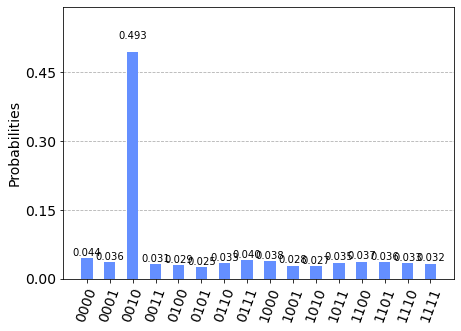

In [13]:
grover_circuit.measure_all()

qasm_sim = Aer.get_backend('qasm_simulator')
qobj = assemble(grover_circuit)
result = qasm_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)